# **Recomendation Systems and Deep Learning**

Implementing recommedation systems on movie dataset using different approaches and at the end using deep learning.

Dataset Used: MovieLens Dataset of 1 Million ratings for nearly 3,900 Movies by around 6,000 Users. This dataset was selected because it has the feature with which we can use different reccomendation methods on it.

Methods Implemented: Content-Based Filtering, Collaborative Filtering, Model Based Filtering, Model based on Deep Learning


In [ ]:
# Libraries
import os
import pandas as pd

Preparing Data.

In [ ]:
#Read Data Files
ratings = pd.read_csv(os.path.join('.', 'ratings.dat'), sep='::', engine='python', encoding='latin-1', names=['user_id', 'movie_id', 'rating', 'timestamp'])
totalUsers = ratings['user_id'].drop_duplicates().max()
totalMovies = ratings['movie_id'].drop_duplicates().max()

#Process ratings dataframe for Deep Learning model
# ratings['user_emb_id'] = ratings['user_id'] - 1
# ratings['movie_emb_id'] = ratings['movie_id'] - 1

users = pd.read_csv(os.path.join('.', 'users.dat'), sep='::', engine='python', encoding='latin-1', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])

# Desc variables for age and occupation attribute set according to Dataset README.
ageDesc = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
occupationDesc = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student", 5: "customer service", 6: "doctor/health care", 7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

# users['age_desc'] = users['age'].apply(lambda x: ageDesc[x])
# users['occ_desc'] = users['occupation'].apply(lambda x: occupationDesc[x])

movies = pd.read_csv(os.path.join('.', 'movies.dat'), sep='::', engine='python', encoding='latin-1', names=['movie_id', 'title', 'genres'])

print('Total Ratings:', len(ratings))
print('Total User Data:', len(users))
print('Total Movie Data:', len(movies))

Total Ratings: 1000209
Total User Data: 6040
Total Movie Data: 3883


In [ ]:
# Data to CSV Files
ratings.to_csv('ratings.csv', sep='\t', header=True, encoding='latin-1', columns=['user_id', 'movie_id', 'rating', 'timestamp'])
users.to_csv('users.csv', sep='\t', header=True, encoding='latin-1', columns=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
movies.to_csv('movies.csv', sep='\t', header=True, columns=['movie_id', 'title', 'genres'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [ ]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ratings.csv', sep='\t', names=column_names, header=1)
df.head()

,user_id,item_id,rating,timestamp
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
column_names = ['item_id', 'title', 'genres']
movies = pd.read_csv('movies.csv', sep='\t', names=column_names, header=1)
movies.head()

,item_id,title,genres
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


In [ ]:
movie_titles = movies[['item_id', 'title']]
movie_titles.head()

,item_id,title
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)


In [ ]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,1,661,3,978302109,James and the Giant Peach (1996)
1,23,661,2,978460739,James and the Giant Peach (1996)
2,49,661,3,977972750,James and the Giant Peach (1996)
3,53,661,5,977979726,James and the Giant Peach (1996)
4,57,661,4,977935511,James and the Giant Peach (1996)


In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Song of Freedom (1936)                       5.0
Ulysses (Ulisse) (1954)                      5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Name: rating, dtype: float64

In [ ]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: rating, dtype: int64

In [ ]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [ ]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


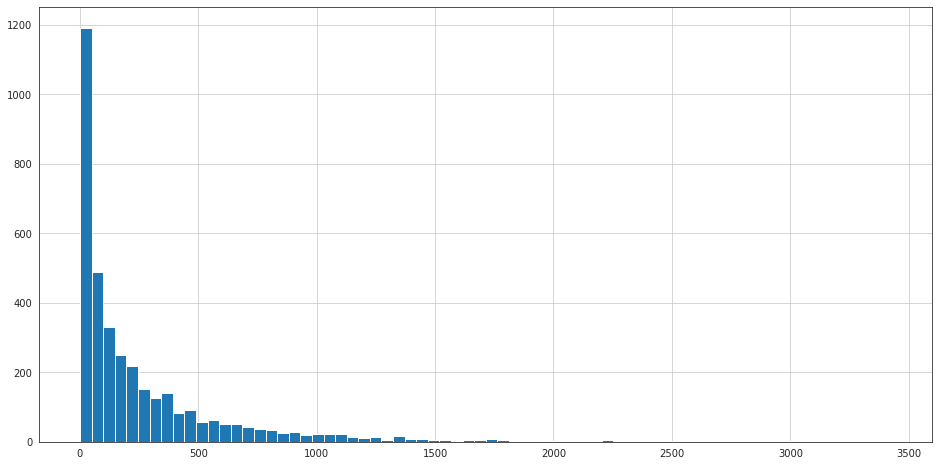

In [ ]:
plt.figure(figsize=(16,8))
ratings['num of ratings'].hist(bins=70)

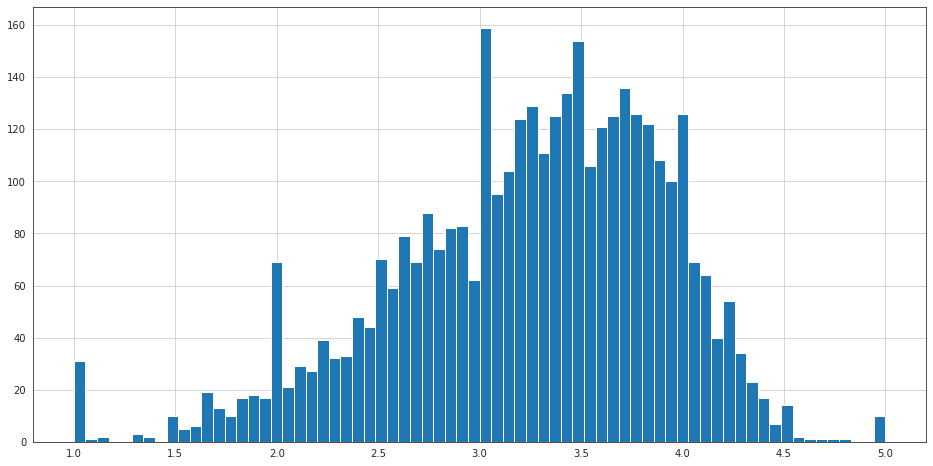

In [ ]:
plt.figure(figsize=(16,8))
ratings['rating'].hist(bins=70)

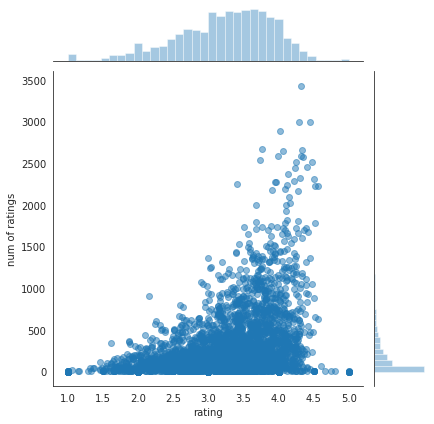

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)